### Prueba Data Science - LATAM

In [50]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors
from datetime import datetime

In [51]:
data =pd.read_csv('dataset_SCL.csv')
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3508\2212962266.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 1. Analisis de distribución de datos en vuelos

In [52]:
data.isna().count()

Fecha-I      68206
Vlo-I        68206
Ori-I        68206
Des-I        68206
Emp-I        68206
Fecha-O      68206
Vlo-O        68206
Ori-O        68206
Des-O        68206
Emp-O        68206
DIA          68206
MES          68206
AÑO          68206
DIANOM       68206
TIPOVUELO    68206
OPERA        68206
SIGLAORI     68206
SIGLADES     68206
dtype: int64

No se observa ningun dato nulo por lo que no se requiere realizar un tratamiento para reemplazarlos o eliminarlos si hubiera sido necesario.

Para analizar la distribución de los datos realizare gráficos para cada una de las variables buscando las diferencias o similitudes que pueda observar en estos gráficos.

[Text(0.5, 1.0, 'Vuelos por dia del mes'), Text(0, 0.5, 'cantidad de vuelos')]

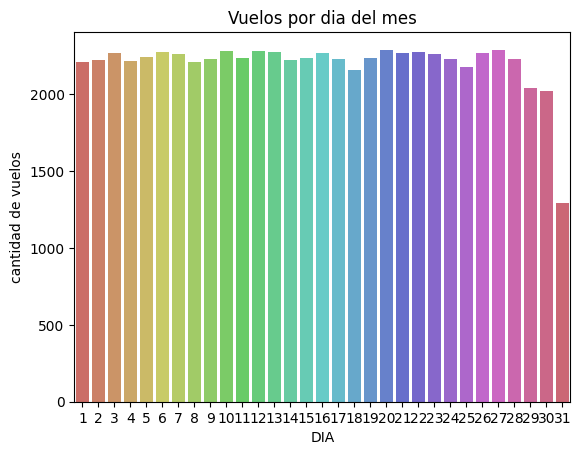

In [53]:
sn.countplot(x = 'DIA',data=data,palette='hls').set(title='Vuelos por dia del mes',ylabel ='cantidad de vuelos')


La cantidad de vuelos se ve uniforme a traves de los dias del mes con la excepcion del dia 31 en donde se ve una disminución. Esto podría ser explicado porque no todos los meses tiene 31 dias por lo que esto implicaria una disminución en los vuelos.

[Text(0.5, 1.0, 'Vuelos por mes del año'), Text(0, 0.5, 'cantidad de vuelos')]

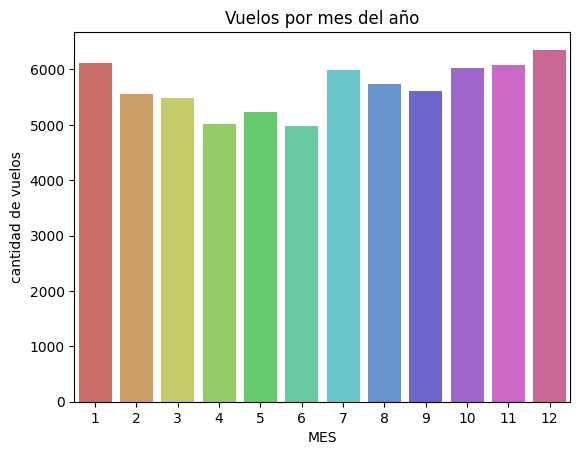

In [54]:
sn.countplot(x = 'MES',data=data,palette='hls').set(title='Vuelos por mes del año',ylabel ='cantidad de vuelos')


La cantidad de vuelos por mes es relativamente consistente y solo se observa una ligera disminución en los meses de abril, mayo y junio.

[Text(0.5, 1.0, 'Vuelos por año '), Text(0, 0.5, 'cantidad de vuelos')]

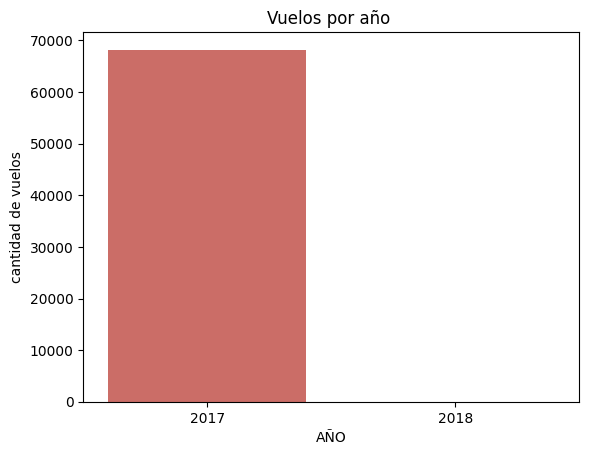

In [55]:
sn.countplot(x = 'AÑO',data=data,palette='hls').set(title='Vuelos por año ',ylabel ='cantidad de vuelos')

Se observa que casi todos los vuelos que se encuentran en la base de datos son del año 2017 por lo que podria ser una variable a no considerar o evaluar eliminar aquellos datos que tengan como año 2018. Esto pues es posible que con cambios en los aeropuestos se vean modificadas las cantidad de vuelvos. (Revisar)

[Text(0.5, 1.0, 'Vuelos por dia de la semana'),
 Text(0, 0.5, 'cantidad de vuelos')]

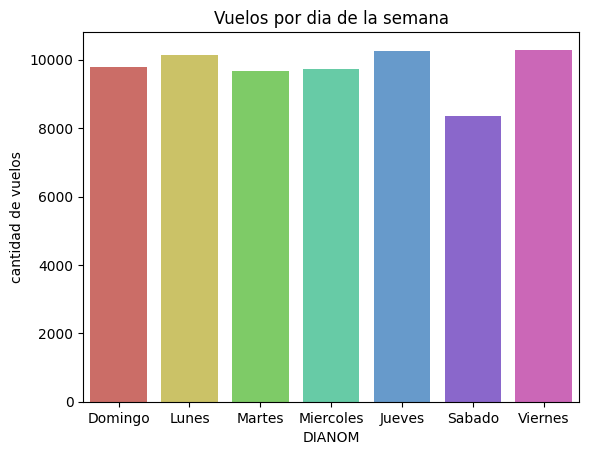

In [56]:
sn.countplot(x = 'DIANOM',data=data,palette='hls').set(title='Vuelos por dia de la semana',ylabel ='cantidad de vuelos')


Al igual que las variables observadas anteriormente se observa una uniformidad en la cantidad de vuelos a traves de los dias de la semana. El unico dia donde hay una ligera disminución es el dia sabado.

[Text(0.5, 1.0, 'Tipos de vuelo'), Text(0, 0.5, 'cantidad de vuelos')]

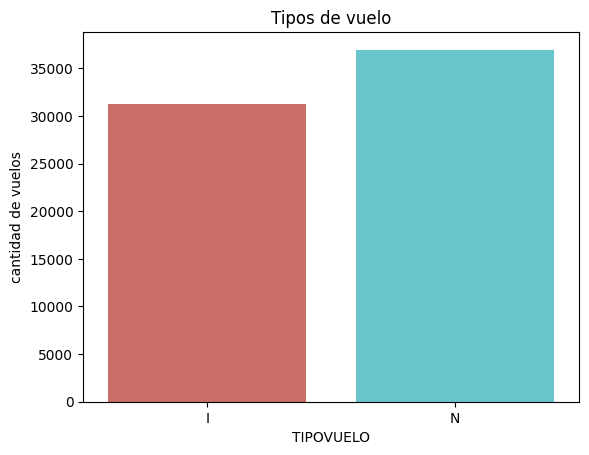

In [57]:
sn.countplot(x = 'TIPOVUELO',data=data,palette='hls').set(title='Tipos de vuelo',ylabel ='cantidad de vuelos')

Se observa una mayor cantidad de vuelos nacionales pero la diferencia entre estos no se ve muy significativa.

[Text(0, 0, 'Grupo LATAM'),
 Text(1, 0, 'Sky Airline'),
 Text(2, 0, 'Aerolineas Argentinas'),
 Text(3, 0, 'Copa Air'),
 Text(4, 0, 'Latin American Wings'),
 Text(5, 0, 'Avianca'),
 Text(6, 0, 'JetSmart SPA'),
 Text(7, 0, 'Gol Trans'),
 Text(8, 0, 'American Airlines'),
 Text(9, 0, 'Air Canada'),
 Text(10, 0, 'Iberia'),
 Text(11, 0, 'Delta Air'),
 Text(12, 0, 'Air France'),
 Text(13, 0, 'Aeromexico'),
 Text(14, 0, 'United Airlines'),
 Text(15, 0, 'Oceanair Linhas Aereas'),
 Text(16, 0, 'Alitalia'),
 Text(17, 0, 'K.L.M.'),
 Text(18, 0, 'British Airways'),
 Text(19, 0, 'Qantas Airways'),
 Text(20, 0, 'Lacsa'),
 Text(21, 0, 'Austral'),
 Text(22, 0, 'Plus Ultra Lineas Aereas')]

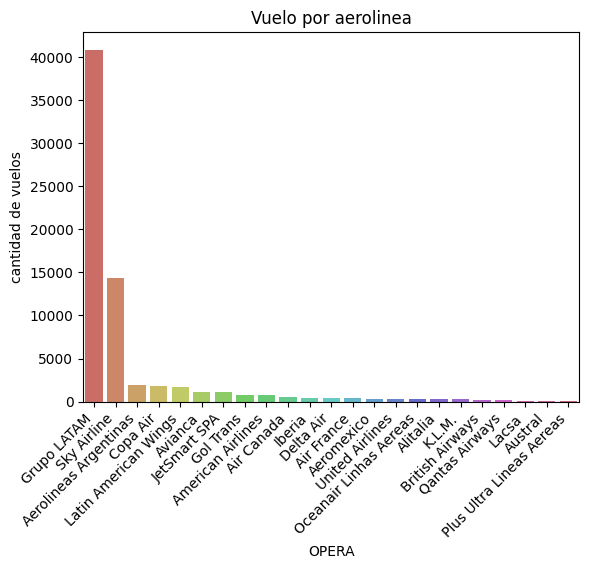

In [58]:
graph= sn.countplot(x = 'OPERA',data=data,palette='hls',order=data['OPERA'].value_counts().index)
graph.set(title='Vuelo por aerolinea',ylabel ='cantidad de vuelos')
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

La mayoria de los vuelos son del grupo LATAM. Parece haber una distribución pareto en la distribución de los vuelos, incluso estimaria que mas del 90% de los vuelos son manejados por el grupo LATAM y por Sky Airlane.

[Text(0, 0, 'Buenos Aires'),
 Text(1, 0, 'Antofagasta'),
 Text(2, 0, 'Lima'),
 Text(3, 0, 'Calama'),
 Text(4, 0, 'Puerto Montt'),
 Text(5, 0, 'Concepcion'),
 Text(6, 0, 'Iquique'),
 Text(7, 0, 'Sao Paulo'),
 Text(8, 0, 'Temuco'),
 Text(9, 0, 'Arica'),
 Text(10, 0, 'La Serena'),
 Text(11, 0, 'Punta Arenas'),
 Text(12, 0, 'Ciudad de Panama'),
 Text(13, 0, 'Copiapo'),
 Text(14, 0, 'Mendoza'),
 Text(15, 0, 'Bogota'),
 Text(16, 0, 'Rio de Janeiro'),
 Text(17, 0, 'Montevideo'),
 Text(18, 0, 'Cordoba'),
 Text(19, 0, 'Miami'),
 Text(20, 0, 'Madrid'),
 Text(21, 0, 'Balmaceda'),
 Text(22, 0, 'Valdivia'),
 Text(23, 0, 'Ciudad de Mexico'),
 Text(24, 0, 'Isla de Pascua'),
 Text(25, 0, 'Guayaquil'),
 Text(26, 0, 'Nueva York'),
 Text(27, 0, 'Auckland N.Z.'),
 Text(28, 0, 'Paris'),
 Text(29, 0, 'Atlanta'),
 Text(30, 0, 'Dallas'),
 Text(31, 0, 'Houston'),
 Text(32, 0, 'Toronto'),
 Text(33, 0, 'Osorno'),
 Text(34, 0, 'Roma'),
 Text(35, 0, 'Castro (Chiloe)'),
 Text(36, 0, 'Asuncion'),
 Text(37, 0, 'La Pa

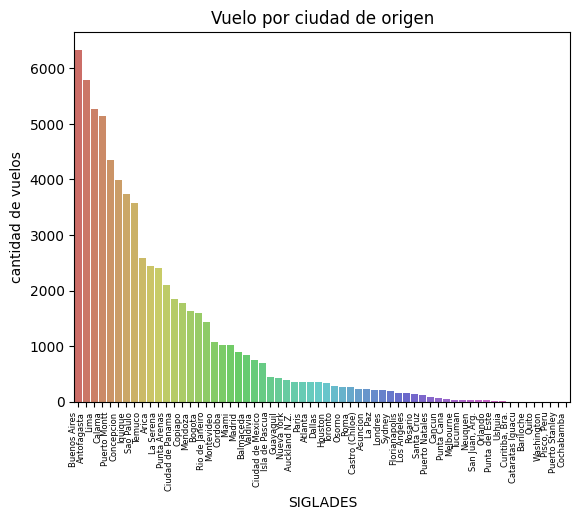

In [59]:
graph= sn.countplot(x = 'SIGLADES',data=data,palette='hls',order=data['SIGLADES'].value_counts().index)
graph.set(title='Vuelo por ciudad de origen',ylabel ='cantidad de vuelos')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=6)

Se observa una gran diferencia en los destinos de los vuelos. Siendo la mayoría Buenos Aires. La mayor cantidad de vuelos se observa que son hacia Sudamérica.

 Para el caso de ciudad de origen se vio que todos se originan el Santiago por lo que se decidio que no era un gráfico que aportara información.

## 2. Creación de columnas nuevas

Se crea la columna temporada alta

In [60]:
def temporada_alta(h):
    año = int(h.split('-')[0])
    fecha = datetime.strptime(h,'%Y-%m-%d %H:%M:%S')
    cond1 = fecha >= datetime.strptime('07-15','%m-%d').replace(year=año) and fecha <= datetime.strptime('07-31','%m-%d').replace(year=año)
    cond2 = fecha >= datetime.strptime('09-11','%m-%d').replace(year=año) and fecha <= datetime.strptime('09-30','%m-%d').replace(year=año)
    cond3 = fecha >=datetime.strptime('12-15','%m-%d').replace(year=año) and fecha <= datetime.strptime('12-31','%m-%d').replace(year=año)
    cond4 = fecha >= datetime.strptime('01-01','%m-%d').replace(year=año) and fecha <= datetime.strptime('03-03','%m-%d').replace(year=año)
    if cond1 or cond2 or cond3 or cond4:
        return 1
    else: 
        return 0


In [61]:
data['temporada_alta'] = data['Fecha-I'].apply(lambda x: temporada_alta(x))

Creación columna diferencia entre la hora programada y la hora real en minutos y creación de columna atraso_15 en la cual se evalua si la diferencia calculada anterior

In [62]:
data['dif_min'] = (pd.to_datetime(data['Fecha-O'])-pd.to_datetime(data['Fecha-I'])).astype('timedelta64[m]')
data['atraso_15'] = np.where(data['dif_min']>15,1,0)

In [63]:
def periodo_dia(x):
    hora = datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time()
    cond1 = hora > datetime.strptime('05:00','%H:%M').time() and hora < datetime.strptime('11:59','%H:%M').time()
    cond2 = hora > datetime.strptime('12:00','%H:%M').time() and hora < datetime.strptime('18:59','%H:%M').time()
    cond3 = hora > datetime.strptime('19:00','%H:%M').time() and hora < datetime.strptime('23:59','%H:%M').time()
    cond4 = hora > datetime.strptime('00:00','%H:%M').time() and hora < datetime.strptime('04:59','%H:%M').time()
    if cond1:
        return 'mañana'
    elif cond2:
        return 'tarde'
    elif cond3 or cond4:
        return 'noche'


In [64]:
data['periodo_dia'] = data['Fecha-I'].apply(lambda x: periodo_dia(x))

In [65]:
data.groupby(['periodo_dia']).count()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15
periodo_dia,,,,,,,,,,,,,,,,,,,,,
mañana,24867,24867,24867,24867,24867,24867,24866,24867,24867,24867,...,24867,24867,24867,24867,24867,24867,24867,24867,24867,24867
noche,17059,17059,17059,17059,17059,17059,17059,17059,17059,17059,...,17059,17059,17059,17059,17059,17059,17059,17059,17059,17059
tarde,25050,25050,25050,25050,25050,25050,25050,25050,25050,25050,...,25050,25050,25050,25050,25050,25050,25050,25050,25050,25050


In [66]:
syntetic_data = pd.DataFrame()
syntetic_data['temporada_alta'] = data['temporada_alta']
syntetic_data['dif_min'] = data['dif_min']
syntetic_data['atraso_15'] = data['atraso_15']
syntetic_data['periodo_dia'] = data['periodo_dia']
syntetic_data.to_csv('syntetic_features.csv')